# 라이브러리 임포트 및 데이터 불러오기

In [ ]:
# 라이브러리 import
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.preprocessing import MultiLabelBinarizer
from wordcloud import WordCloud
import random
from PIL import Image

In [ ]:
# 캐글 넷플릭스 데이터
path = '/content/drive/MyDrive/아이펠/해커톤 1/넷플릭스/'
path_1 = path + 'netflix_titles.csv'
netflix = pd.read_csv(path_1)

In [ ]:
# 다른 데이터들 불러오기
# 넷플릭스 오리지널
path_2 = path + 'NetflixOriginals.csv'
netflix_original = pd.read_csv(path_2, encoding='latin1')

#넷플릭스 오리지널 두번째 데이터셋
path_3= path + 'Netflix Original Content Dataset.csv'
netflix_original_2 = pd.read_csv(path_3, encoding='latin1')

# 넷플릭스 구독료
path_4 = path + 'Netflix subscription fee Dec-2021.csv'
netflix_cost = pd.read_csv(path_4, encoding='latin1')

# 넷플릭스 주가
path_5 = path + 'NFLX_stock_2002to2021.csv'
netflix_stock = pd.read_csv(path_5, index_col='Date', parse_dates=True, encoding='latin1')

# 디즈니플러스 데이터
path_6 = path + 'disney_plus_titles.csv'
disney = pd.read_csv(path_6)

# 디즈니플러스 주가
path_7 = path + 'DIS_stock_2019to2022.csv'
disney_stock = pd.read_csv(path_7, index_col='Date', parse_dates=True, encoding='latin1')

# 김선아 파트

# 넷플릭스 영화 분석

## 데이터 불러오기

**Data Description**

- `show_id` - Unique ID for every Movie/TV Show.
- `type` - Type of Content: Movie/TV Show.
- `title` - Name of the Movie/TV Show.
- `director` - Name of the Director of the Movie/TV Show.
- `cast` - Actors involved in the Movie/TV Show.
- `country` - Name of the Countries where the Movie/TV Show is produced.
- `date_added` - The Date in which the Movie/TV Show was added on Netflix.
- `release_year` - Original Release Year of the Movie/TV Show.
- `rating` - Rating of the Movie/TV Show.
- `duration` - Total Duration of the Movie (in Minutes) or TV Show (in Seasons).
- `listed_in` - Genre of the Movie/TV Show.
- `description` - Summary of the Movie/TV Show.

In [ ]:
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [ ]:
# Checking Shape of Dataset
netflix.shape

(8807, 12)

In [ ]:
# How many columns are present in the Dataset?
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Informations about the Dataset
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


- `director`, `cast`, `country`, `date_add`, `rating`, `duration` 컬럼에서 결측치가 있음
- 특히 `director`, `cast`, `country`에서 결측치가 많아 보임

In [ ]:
# 데이터 셋 describe
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


- 유일한 숫자 데이터(**int64**)인 `release_year` 시리즈에 대해서만 `describe()`가 진행되었다.
- 평균이 `2014년`으로 나왔는데, 대략적으로 그 즈음부터 공개 작품 건수가 많아진 것으로 해석된다. 👉 **뒤의 시각화에서 확인해 봅시다!**

## 결측치가 있는지 확인

In [ ]:
# 각 시리즈별 결측치 수 확인
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

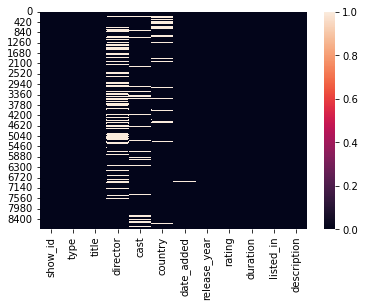

In [ ]:
# 결측치 히트맵 그리기
sns.heatmap(netflix.isnull())

## 중복값 확인

In [ ]:
# 중복값이 있는지 확인한다.
netflix.duplicated().sum()

0

- 중복값 없음

## 각 시리즈 별 데이터 수 확인

`장르`, `감독`, `배우`별 작품 수를 구하려니 조금 난감했던 것이, 여러 장르, 여러명의 감독, 배우가 겹쳐져 있어서 각 개별 요소로 떼어내는 작업이 필요했다.❗❗

그냥 `value_counts()`를 사용하는 것으로는 추출되지 않았음

- **`장르`별 작품 수**

In [ ]:
# 결측치가 제거된 listed_in 시리즈를 listed_in 변수에 저장한다.
listed_in = netflix['listed_in'].dropna()
listed_in

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

In [ ]:
genre = []

for idx, v in enumerate(listed_in):
    c = v.split(', ')
    genre.extend(c)

# 장르 별 고유 리스트를 만들어 준다.
genre = np.unique(genre)

# 총 장르 수 확인
len(genre)

42

In [ ]:
# 각 장르 별 작품 수를 딕셔너리로 만들어 준다.
genre_dict = {g : len(netflix.index[netflix['listed_in'].notnull()][netflix['listed_in'].dropna().str.contains(pat = g)]) for g in genre}

# genre_dict 데이터 프레임으로 만들어 준다.
genre_df = pd.DataFrame.from_dict(genre_dict, orient='index', columns = ['number'])

# 작품 수가 Top 20인 장르들을 추려 본다.
genre_top_20 = genre_df.nlargest(20, 'number')

In [ ]:
px.histogram(genre_top_20, x = genre_top_20.index, y = genre_top_20['number'], color = genre_top_20.index)

- **Movies**와 **Dramas** 장르가 가장 많은 비중을 차지 했다.
- **International Movies**와 **TV shows**, **International TV shows**가 각각 **3, 5, 6위**를 차지했고, 흥미로운 점은 **Comedies**가 **4위**를 기록했다는 것이다.
- 물론 드라마, 영화의 세부 장르 중 하나일 것으로 예상되지만, **2,000편**이 넘는 작품 수와 순위가 의외라고 느껴졌다.

- **`감독`별 작품 수**

In [ ]:
director = netflix['director'].dropna().value_counts()
director

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [ ]:
px.histogram(director, x = director.index[:30], y = director[:30], color = director[:30].index)

- **`배우`별 작품 수**

In [ ]:
# 엠마 스톤이 출연한 작품 수 구하기
len(netflix.index[netflix['cast'].notnull()][netflix['cast'].dropna().str.contains("Emma Stone")])

8

- 위의 내용을 함수로 만들어준다.

In [ ]:
# 결측치가 제거된 cast 시리즈를 cast 변수에 저장한다.
cast = netflix['cast'].dropna()
cast

1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
5       Kate Siegel, Zach Gilford, Hamish Linklater, H...
6       Vanessa Hudgens, Kimiko Glenn, James Marsden, ...
                              ...                        
8801    Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 7982, dtype: object

In [ ]:
actor = []

# cast 시리즈에서 여러명의 배우가 겹쳐져 있는 데이터를 한명 씩 분리하여 actor 리스트에 넣어준다.
for idx, v in enumerate(cast):
    c = v.split(', ')
    actor.extend(c)

# 배우 별 고유 리스트를 만들어 준다.
actor = np.unique(actor)

# 총 배우 수 확인
len(actor)

36439

- 배우는 총 **36439명** 이다.

In [ ]:
# 각 배우 별 출연 작품 수를 딕셔너리로 만들어 준다.
actor_dict = {a : len(netflix.index[netflix['cast'].notnull()][netflix['cast'].dropna().str.contains(pat = a)]) for a in actor}

# actor_dict를 데이터 프레임으로 만들어 준다.
actor_df = pd.DataFrame.from_dict(actor_dict, orient='index', columns = ['number'])

- 많은 작품에 나온 배우들은 오히려 유명하지 않은 배우가 많은 것 같아서, 가장 적은 작품에 출연한 배우들을 추려보았다.

In [ ]:
# 배우들의 작품 수 별 출연 횟수
actor_count = pd.DataFrame(actor_df.value_counts())
actor_count

,0
number,
1,25213
2,5452
3,2325
4,1136
5,699
...,...
29,1
51,1
31,1


In [ ]:
# 파이 그래프 그리기
fig = px.pie(actor_count, labels=actor_count.index, names=actor_count[0], values=actor_count[0], title='FILMS')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

- `69.2%`나 되는 배우들이 한 작품에만 출연한 것을 알 수 있었다.
- 그래서 배우별 작품 수를 구하고 싶었으나, **2만 5천명**이 넘는 배우들이 한 작품에만 출연했기 때문에 **다작 배우 TOP 50**이런 주제로 그래프로 작성하는 것이 불가능 했다.

# 넷플릭스 주가 데이터와 연계

- **2002년**부터 **2021년** 까지의 주가 데이터 이다.
- 넷플릭스 데이터의 **`date_added`** 컬럼과 주가 변동과의 관계가 있는지 궁금했다.

**Data Description**

- `Date` : 날짜
- `Open` : 시가
- `High` : 상한가
- `Low` : 하한가
- `Close` : 종가
- `Adj Close` : 적용된 종가
- `Volume` : 일 거래량

In [ ]:
netflix_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
4869,2021-09-24,592.500000,592.979980,583.640015,592.390015,592.390015,2124800
4870,2021-09-27,587.950012,593.580017,576.929993,592.640015,592.640015,2504700
4871,2021-09-28,589.000000,599.539978,580.159973,583.849976,583.849976,4431100
4872,2021-09-29,589.010010,609.880005,588.010010,599.059998,599.059998,6221000


In [ ]:
# 데이터 셋의 shape를 확인
netflix_stock.shape

(4874, 7)

In [ ]:
# 주가 데이터의 컬럼명을 확인한다.
netflix_stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
# Informations about the Dataset
netflix_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4874 entries, 0 to 4873
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4874 non-null   object 
 1   Open       4874 non-null   float64
 2   High       4874 non-null   float64
 3   Low        4874 non-null   float64
 4   Close      4874 non-null   float64
 5   Adj Close  4874 non-null   float64
 6   Volume     4874 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 266.7+ KB


- 결측치가 없는 데이터

In [ ]:
# 데이터 셋 describe
netflix_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4874.000000,4874.000000,4874.000000,4874.000000,4874.000000,4.874000e+03
mean,104.644811,106.243736,103.006660,104.686524,104.686524,1.681687e+07
std,155.886656,158.173217,153.546958,155.940368,155.940368,1.937625e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.901429,3.977143,3.835357,3.905714,3.905714,6.301225e+06
50%,21.386429,21.816429,20.935714,21.233572,21.233572,1.084630e+07
75%,125.445000,126.592499,122.987499,125.097502,125.097502,2.016192e+07
max,608.049988,619.000000,608.049988,610.340027,610.340027,3.234140e+08


## 중복값 확인

In [ ]:
# 중복값이 있는지 확인한다.
netflix_stock.duplicated().sum()

0

- 중복값 없음

## 넷플릭스 주식 추이 시각화

In [ ]:
netflix_stock['Date'] = pd.to_datetime(netflix_stock['Date'])
netflix_stock = netflix_stock.set_index('Date')
netflix_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


Text(0.5, 1.0, 'Volume of stock versus time')

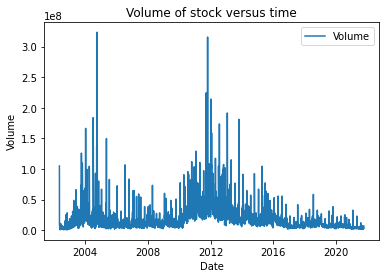

In [ ]:
# 연도별 거래량 추이
sns.lineplot(x=netflix_stock.index,y=netflix_stock['Volume'],label='Volume')
plt.title('Volume of stock versus time')

- **2004년 ~ 2005년, 2012년**에 거래량이 엄청나게 늘었다.
- **2019년** 코로나 팬데믹 이후에 거래량이 늘었을 것으로 예상했는데, **2012년** 거래량 폭등이후 계속해서 감소 추세를 보이고 있다.

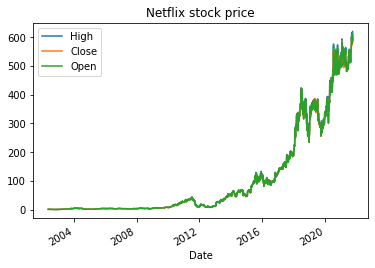

In [ ]:
# 연도별 주가 추이
netflix_stock.plot(y=['High','Close','Open'],title='Netflix stock price')

- **2016년 이후**부터는 꾸준히 상승 곡선을 그리고 있다. 👉 거래량은 줄어들었지만 주가는 상승! 주가가 오르면서 새로 매수하려는 거래량이 줄어들지 않았을까, 예측할 수 있다. 매도도 줄어들 수 밖에 없는 것이, 계속해서 주가가 오르고 있기 때문에 더 높은 이윤을 기대할 수 있기 때문이라고 생각한다.
- 특히 **2019년 코로나 팬데믹 이후**는 가파르게 상승했는데, 모두가 아시다시피 이 때는 집콕 문화 중 하나로 넷플릭스가 자리매김하고 보편화 된 시점이다.

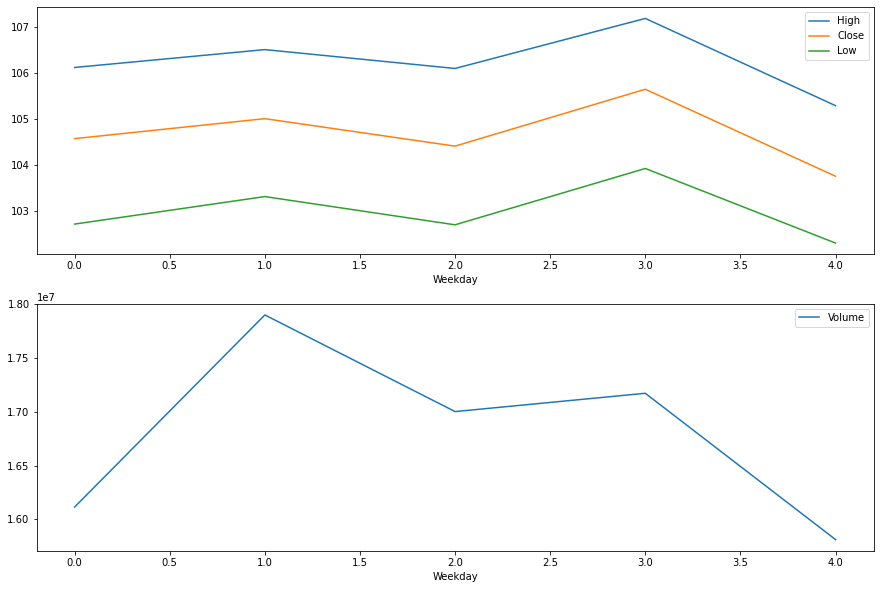

In [ ]:
# 요일별 주가 변동 및 주식 거래량
fig, (ax1,ax2) = plt.subplots(2,figsize=(15,10))
netflix_stock.groupby(netflix_stock.index.day_of_week).mean().plot(y=['High','Close','Low'],ax=ax1,xlabel='Weekday')
netflix_stock.groupby(netflix_stock.index.day_of_week).mean().plot(y='Volume',ax=ax2,xlabel='Weekday')

- 주식 거래는 평일에만 장이 열리므로, **월(0) ~ 금(4)** 데이터로 표시 된다.
- 근소한 차이기는 하지만, **목요일**에 살짝 주가가 오르는 추세를 보인다.
- 거래량은 **화요일**이 높은 것으로 나타난다.

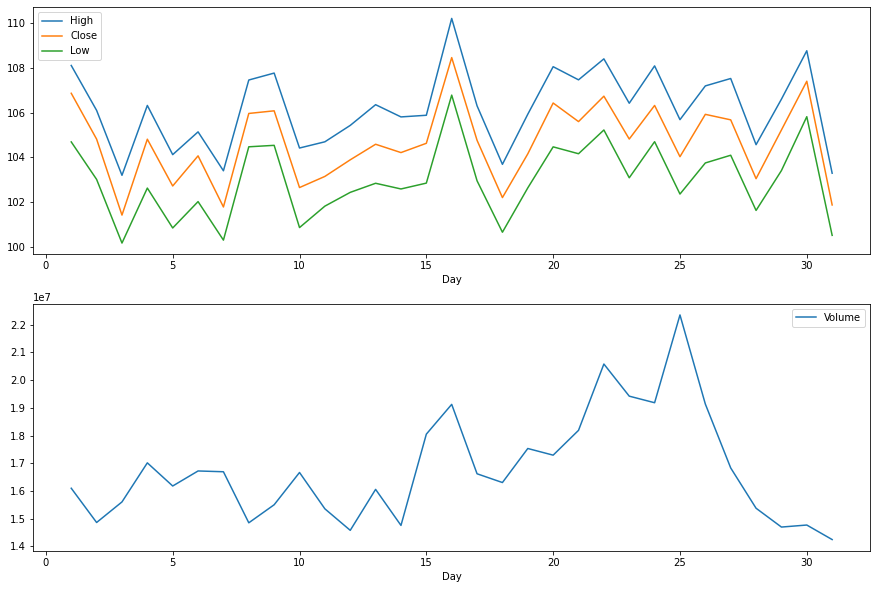

In [ ]:
# 날짜별 주가 변동 및 주식 거래량
fig, (ax1,ax2) = plt.subplots(2,figsize=(15,10))
netflix_stock.groupby(netflix_stock.index.day).mean().plot(y=['High','Close','Low'],ax=ax1,xlabel='Day')
netflix_stock.groupby(netflix_stock.index.day).mean().plot(y='Volume',ax=ax2,xlabel='Day')

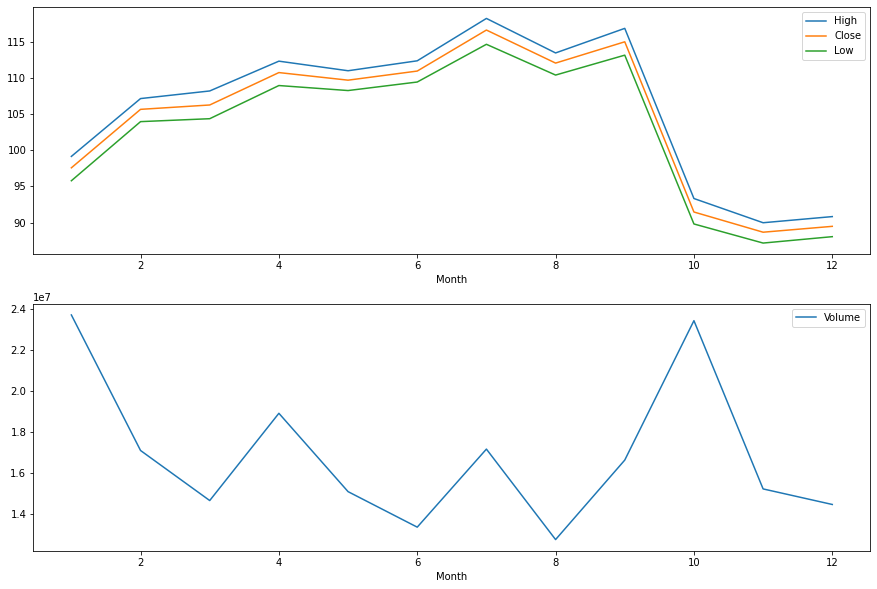

In [ ]:
# 월별 주가 변동 및 주식 거래량
fig, (ax1,ax2) = plt.subplots(2,figsize=(15,10))
netflix_stock.groupby(netflix_stock.index.month).mean().plot(y=['High','Close','Low'],ax=ax1,xlabel='Month')
netflix_stock.groupby(netflix_stock.index.month).mean().plot(y='Volume',ax=ax2,xlabel='Month')

- 매년 **9월~10월**에 **주가**가 눈에 띄게 하락하는 모양이 보인다.
- **거래량**은 반대로 **매년 9월~10월**에 거래량이 증가하는데, 이런 움직임은 주가가 하락하기 때문에 얼른 매도하려는 사람이 많아져서 그런 것이 아닐까 생각한다.

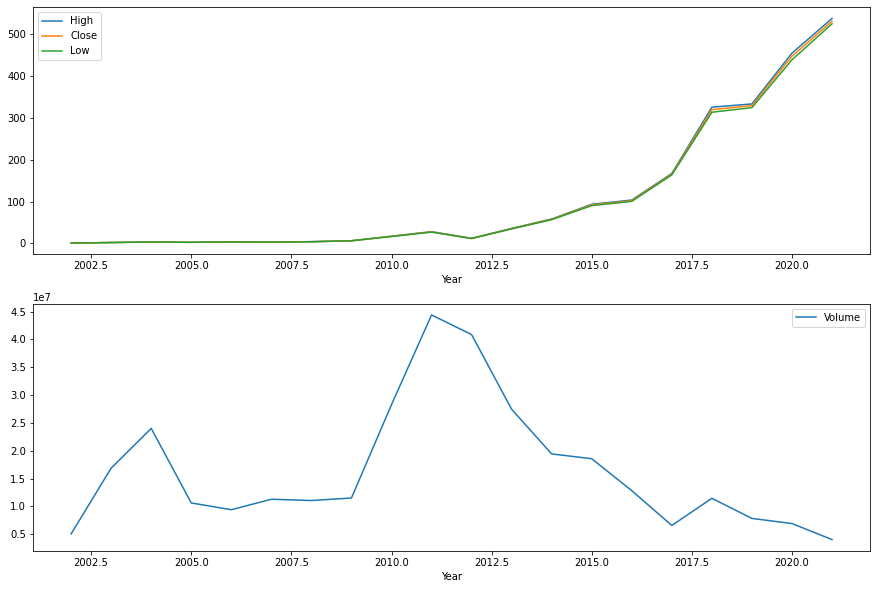

In [ ]:
# 연도별 주가 변동 및 주식 거래량
fig, (ax1,ax2) = plt.subplots(2,figsize=(15,10))
netflix_stock.groupby(netflix_stock.index.year).mean().plot(y=['High','Close','Low'],ax=ax1,xlabel='Year')
netflix_stock.groupby(netflix_stock.index.year).mean().plot(y='Volume',ax=ax2,xlabel='Year')

- **주가**는 점점 오르고 있지만, **거래량**은 2012년 이후 하락하고 있다.

## ✨연도별 주가 변동과 넷플릭스에 등록되는 작품 수의 상관관계분석

In [ ]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix = netflix.set_index('date_added')

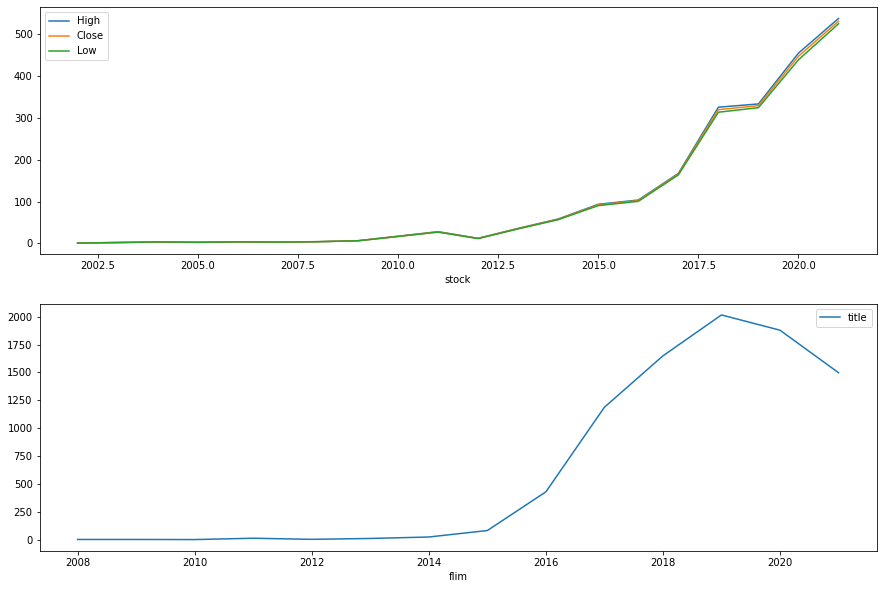

In [ ]:
# 연도별 주가 변동 및 주식 거래량
fig, (ax1,ax2) = plt.subplots(2,figsize=(15,10))
netflix_stock.groupby(netflix_stock.index.year).mean().plot(y=['High','Close','Low'],ax=ax1,xlabel='stock')
netflix.groupby(netflix.index.year).count().plot(y='title',ax=ax2,xlabel='flim')

- **연도별 주가**와 **연도별 넷플릭스 등록 작품 수**가 어느 정도 비례하는 모양을 보인다.
- 특히 **2015년~2019년**은 넷플릭스가 본격적으로 성장하는 시기라고 볼 수 있다.
- **넷플릭스 작품 타이틀** 데이터 셋이 **2020년 9월**까지의 데이터라 작품수가 줄어든 것 처럼 보이긴 하지만, **12월 말**까지의 데이터가 있었더라면 등록 작품 수도 2019년보다 더 많을 것으로 예상된다.

# 디즈니 플러스 영화 분석

## 데이터 불러오기

**Data Description**

- `show_id` - Unique ID for every Movie/TV Show.
- `type` - Type of Content: Movie/TV Show.
- `title` - Name of the Movie/TV Show.
- `director` - Name of the Director of the Movie/TV Show.
- `cast` - Actors involved in the Movie/TV Show.
- `country` - Name of the Countries where the Movie/TV Show is produced.
- `date_added` - The Date in which the Movie/TV Show was added on Netflix.
- `release_year` - Original Release Year of the Movie/TV Show.
- `rating` - Rating of the Movie/TV Show.
- `duration` - Total Duration of the Movie (in Minutes) or TV Show (in Seasons).
- `listed_in` - Genre of the Movie/TV Show.
- `description` - Summary of the Movie/TV Show.

In [ ]:
desney

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


In [ ]:
# Checking Shape of Dataset
desney.shape

(1450, 12)

In [ ]:
# How many columns are present in the Dataset?
desney.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Informations about the Dataset
desney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


- `director`, `cast`, `country`, `date_add`, `rating` 컬럼에서 결측치가 있음
- 특히 `director`, `cast`, `country`에서 결측치가 많아 보임

In [ ]:
# 데이터 셋 describe
desney.describe()

,release_year
count,1450.000000
mean,2003.091724
std,21.860162
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


- 유일한 숫자 데이터(**int64**)인 `release_year` 시리즈에 대해서만 `describe()`가 진행되었다.
- 평균이 `2003년`으로 나왔는데, 대략적으로 그 즈음 개봉한 디즈니 영화가 많은 것으로 해석된다. 👉 **뒤의 시각화에서 확인해 봅시다!**

## 결측치가 있는지 확인

In [ ]:
# 각 시리즈별 결측치 수 확인
desney.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

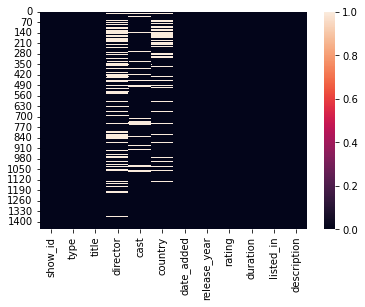

In [ ]:
# 결측치 히트맵 그리기
sns.heatmap(desney.isnull())

## 중복값 확인

In [ ]:
# 중복값이 있는지 확인한다.
desney.duplicated().sum()

0

- 중복값 없음

## 각 시리즈 별 데이터 수 확인

`장르`, `감독`, `배우`별 작품 수를 구하려니 조금 난감했던 것이, 여러 장르, 여러명의 감독, 배우가 겹쳐져 있어서 각 개별 요소로 떼어내는 작업이 필요했다.❗❗

그냥 `value_counts()`를 사용하는 것으로는 추출되지 않았음

- **`장르`별 작품 수**

In [ ]:
# 결측치가 제거된 listed_in 시리즈를 listed_in 변수에 저장한다.
listed_in = desney['listed_in'].dropna()
listed_in

0                                   Animation, Family
1                                              Comedy
2                           Animation, Comedy, Family
3                                             Musical
4                       Docuseries, Historical, Music
                            ...                      
1445        Action-Adventure, Family, Science Fiction
1446                 Action-Adventure, Comedy, Family
1447                      Biographical, Comedy, Drama
1448                     Buddy, Comedy, Coming of Age
1449    Action-Adventure, Animals & Nature, Animation
Name: listed_in, Length: 1450, dtype: object

In [ ]:
genre = []

for idx, v in enumerate(listed_in):
    c = v.split(', ')
    genre.extend(c)

# 장르 별 고유 리스트를 만들어 준다.
genre = np.unique(genre)

# 총 장르 수 확인
len(genre)

44

- 총 장르 수는 **44개**이다.

In [ ]:
# 각 장르 별 작품 수를 딕셔너리로 만들어 준다.
genre_dict = {g : len(desney.index[desney['listed_in'].notnull()][desney['listed_in'].dropna().str.contains(pat = g)]) for g in genre}

# genre_dict 데이터 프레임으로 만들어 준다.
genre_df = pd.DataFrame.from_dict(genre_dict, orient='index', columns = ['number'])

# 작품 수가 Top 20인 장르들을 추려 본다.
genre_top_20 = genre_df.nlargest(20, 'number')

In [ ]:
px.histogram(genre_top_20, x = genre_top_20.index, y = genre_top_20['number'], color = genre_top_20.index)

- 디즈니 영화 답게 **Family, Animation, Comedy, Action-Adventure**가 상위 4위로 랭크 되었다.
- **Animals & Nature, Coming of Age, Fantasy, Documentary**가 비슷한 비율로 다음 랭크를 차지하였다.

- **`감독`별 작품 수**

In [ ]:
director = desney['director'].dropna().value_counts()
director

Jack Hannah         17
John Lasseter       16
Paul Hoen           16
Robert Stevenson    12
Charles Nichols     12
                    ..
Simon Wells          1
David Lynch          1
Don Bluth            1
Milt Schaffer        1
Mark Waring          1
Name: director, Length: 609, dtype: int64

In [ ]:
px.histogram(director, x = director.index[:30], y = director[:30], color = director[:30].index)

- **`배우`별 작품 수**

In [ ]:
# 겨울왕국 엘사 역의 Idina Menzel이 출연한 작품 수 구하기
len(netflix.index[netflix['cast'].notnull()][netflix['cast'].dropna().str.contains("Idina Menzel")])

3

- 위의 내용을 함수로 만들어준다.

In [ ]:
# 결측치가 제거된 cast 시리즈를 cast 변수에 저장한다.
cast = desney['cast'].dropna()
cast

0       Chris Diamantopoulos, Tony Anselmo, Tress MacN...
1                Jim Varney, Noelle Parker, Douglas Seale
2       Raymond Albert Romano, John Leguizamo, Denis L...
3       Darren Criss, Adam Lambert, Derek Hough, Alexa...
4       John Lennon, Paul McCartney, George Harrison, ...
                              ...                        
1445    Hugh Jackman, Liev Schreiber, Danny Huston, wi...
1446    Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...
1447    Tom Costello, Jo Hartley, Keith Allen, Dickon ...
1448    Parminder Nagra, Keira Knightley, Jonathan Rhy...
1449                                        Charlie Tahan
Name: cast, Length: 1260, dtype: object

In [ ]:
actor = []

# cast 시리즈에서 여러명의 배우가 겹쳐져 있는 데이터를 한명 씩 분리하여 actor 리스트에 넣어준다.
for idx, v in enumerate(cast):
    c = v.split(', ')
    actor.extend(c)

# 배우 별 고유 리스트를 만들어 준다.
actor = np.unique(actor)

# 총 배우 수 확인
len(actor)

3759

- 배우는 총 **3,759명** 이다.
- 아마도 더빙 성우로 추정된다. (혹은 디즈니 영화의 특성 상 뮤지컬 배우가 있을 수 있다.)

In [ ]:
# 각 배우 별 출연 작품 수를 딕셔너리로 만들어 준다.
actor_dict = {a : len(desney.index[desney['cast'].notnull()][desney['cast'].dropna().str.contains(pat = a)]) for a in actor}

# actor_dict를 데이터 프레임으로 만들어 준다.
actor_df = pd.DataFrame.from_dict(actor_dict, orient='index', columns = ['number'])

In [ ]:
# 배우들의 작품 수 별 출연 횟수
actor_count = pd.DataFrame(actor_df.value_counts())
actor_count

,0
number,
1,2742
2,558
3,233
4,102
5,44
6,21
8,12
7,11
9,8


In [ ]:
# 파이 그래프 그리기
fig = px.pie(actor_count, labels=actor_count.index, names=actor_count[0], values=actor_count[0], title='FILMS')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

- `약 72.9%`의 배우들이 디즈니 영화에 한 번씩만 출연했다.
- 넷플릭스에서와 마찬가지로, 너무 많은 배우들이 있어서 배우 별 출연 작품 수를 구하지 못하고 출연한 작품 수를 기준으로 배우들의 수를 구해 보았다.

# 정경환 파트

### 영상길이별(영화) 작품수

In [ ]:
# 넷플릭스 데이터프레임에서 type이 'Movie'인 데이터만 분리
nm = netflix[netflix['type'] == 'Movie']
nm[['duration']]

,duration
0,90 min
6,91 min
7,125 min
9,104 min
12,127 min
...,...
8801,96 min
8802,158 min
8804,88 min
8805,88 min


In [ ]:
# duration컬럼에서 영문자를 제외한다
nm['duration']=nm['duration'].str.replace(pat=r'[a-zA-Z]', repl= r'', regex=True)

In [ ]:
# duration컬럼의 데이터를 string에서 float타입으로 변환
nm['duration'] = pd.to_numeric(nm['duration'])

In [ ]:
nm[['duration']]

,duration
0,90.0
6,91.0
7,125.0
9,104.0
12,127.0
...,...
8801,96.0
8802,158.0
8804,88.0
8805,88.0


In [ ]:
nm.describe()

,release_year,duration
count,6131.000000,6128.000000
mean,2013.121514,99.577187
std,9.678169,28.290593
min,1942.000000,3.000000
25%,2012.000000,87.000000
50%,2016.000000,98.000000
75%,2018.000000,114.000000
max,2021.000000,312.000000


In [ ]:
nm.isnull().sum()

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [ ]:
nm.dropna(inplace=True)

In [ ]:
# plotly figure_factory를 통한 시각화
x1 = nm['duration']
fig = ff.create_distplot([x1], ['a'], bin_size=0.7, curve_type='normal', colors=["#db0000"])
fig.update_layout(title_text='Netflix movie duration Distribution')
fig.show()

####디즈니 영상길이별(영화) 작품수

In [ ]:
# 디즈니 데이터프레임에서 type이 'Movie'인 데이터만 분리
dm = disney[disney['type'] == 'Movie']
dm[['duration']]

,duration
0,23 min
1,91 min
2,23 min
3,41 min
5,94 min
...,...
1445,108 min
1446,106 min
1447,107 min
1448,112 min


In [ ]:
# duration컬럼에서 영문자를 제외한다
dm['duration']=dm['duration'].str.replace(pat=r'[a-zA-Z]', repl= r'', regex=True)

In [ ]:
# duration컬럼의 데이터를 string에서 float타입으로 변환
dm['duration'] = pd.to_numeric(dm['duration'])

In [ ]:
# plotly figure_factory를 통한 시각화
x1 = dm['duration']
fig = ff.create_distplot([x1], ['a'], bin_size=0.7, curve_type='normal', colors=["#0E3EDA"])
fig.update_layout(title_text='Disneyplus movie duration Distribution')
fig.show()

### 시즌길이별(TV쇼)작품수

In [ ]:
# 넷플릭스 데이터프레임에서 type이 'TV Show'인 데이터만 분리
nt = netflix[netflix['type'] == 'TV Show']
nt[['duration']]

,duration
1,2 Seasons
2,1 Season
3,1 Season
4,2 Seasons
5,1 Season
...,...
8795,2 Seasons
8796,2 Seasons
8797,3 Seasons
8800,1 Season


In [ ]:
# plotly.express로 시각화
fig = px.histogram(x=nt['duration'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Netflix TV Show Seasons Distribution",
)
fig.show()

####디즈니 시즌길이별(TV쇼)작품수

In [ ]:
# 디즈니 데이터프레임에서 type이 'TV Show'인 데이터만 분리
dt = disney[disney['type'] == 'TV Show']
dt[['duration']]

,duration
4,1 Season
6,1 Season
7,2 Seasons
8,2 Seasons
13,10 Seasons
...,...
1417,4 Seasons
1434,3 Seasons
1439,3 Seasons
1440,2 Seasons


In [ ]:
# plotly.express로 시각화
fig = px.histogram(x=dt['duration'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Disney TV Show Seasons Distribution",
)
fig.show()


### 연도별장르추이

In [ ]:
# 넷플릭스 데이터프레임에서 'listed_in'컬럼을 복사해서 'genre'컬럼을 새로 만듦
netflix['genre'] = netflix['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
netflix['genre'].head()

0                                      [Documentaries]
1    [International TV Shows, TV Dramas, TV Mysteries]
2    [Crime TV Shows, International TV Shows, TV Ac...
3                             [Docuseries, Reality TV]
4    [International TV Shows, Romantic TV Shows, TV...
Name: genre, dtype: object

In [ ]:
# 결측치가 제거된 listed_in 시리즈를 listed_in 변수에 저장한다.
listed_in = netflix['listed_in'].dropna()
listed_in

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

In [ ]:
genre = []

for idx, v in enumerate(listed_in):
    c = v.split(', ')
    genre.extend(c)

# 장르 별 고유 리스트를 만들어 준다.
genre = np.unique(genre)

# 총 장르 수 확인
len(genre)

42

In [ ]:
# 각 장르 별 작품 수를 딕셔너리로 만들어 준다.
genre_dict = {g : len(netflix.index[netflix['listed_in'].notnull()][netflix['listed_in'].dropna().str.contains(pat = g)]) for g in genre}

# genre_dict 데이터 프레임으로 만들어 준다.
genre_df = pd.DataFrame.from_dict(genre_dict, orient='index', columns = ['number'])

# 작품 수가 Top 20인 장르들을 추려 본다.
genre_top_20 = genre_df.nlargest(20, 'number')

In [ ]:
px.histogram(genre_top_20, x = genre_top_20.index, y = genre_top_20['number'], color = genre_top_20.index)

In [ ]:
# 탑 장르 리스트 생성
top_genres = [
    'Movies',
    'Dramas',
    'International Movies',
    'Comedies',
    'TV Shows',
]

In [ ]:
# 탑 장르 리스트에 해당 장르가 있는지 확인하여 반환하는 함수 생성
def check_popular_genre(genres):
    for genre in genres:
        if genre in top_genres:
            return True
    return False

In [ ]:
# 'genre'컬럼을 이용해 'principal_genre' 생성
netflix['principal_genre'] = netflix['genre'].apply(lambda genres: genres[0])
netflix['principal_genre'].head()

0             Documentaries
1    International TV Shows
2            Crime TV Shows
3                Docuseries
4    International TV Shows
Name: principal_genre, dtype: object

In [ ]:
# plotly.express의 sunburst그래프로 시각화
year_genre_df = netflix[(netflix['principal_genre'].isin(top_genres)) & (netflix['release_year'] >= 2017)].groupby(['principal_genre', 'release_year']).agg({'title': 'count'})
year_genre_df = year_genre_df.reset_index()
year_genre_df.columns = ['principal_genre', 'release_year', 'count']

fig = px.sunburst(year_genre_df, path=['release_year', 'principal_genre'], values='count')
fig.show()

####디즈니 연도별장르추이

In [ ]:
# 디즈니 데이터프레임에서 'listed_in'컬럼을 복사해서 'genre'컬럼을 새로 만듦
disney['genre'] = disney['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
disney['genre'].head()

0                [Animation, Family]
1                           [Comedy]
2        [Animation, Comedy, Family]
3                          [Musical]
4    [Docuseries, Historical, Music]
Name: genre, dtype: object

In [ ]:
# 결측치가 제거된 listed_in 시리즈를 listed_in 변수에 저장한다.
listed_in = disney['listed_in'].dropna()
listed_in

0                                   Animation, Family
1                                              Comedy
2                           Animation, Comedy, Family
3                                             Musical
4                       Docuseries, Historical, Music
                            ...                      
1445        Action-Adventure, Family, Science Fiction
1446                 Action-Adventure, Comedy, Family
1447                      Biographical, Comedy, Drama
1448                     Buddy, Comedy, Coming of Age
1449    Action-Adventure, Animals & Nature, Animation
Name: listed_in, Length: 1450, dtype: object

In [ ]:
genre = []

for idx, v in enumerate(listed_in):
    c = v.split(', ')
    genre.extend(c)

# 장르 별 고유 리스트를 만들어 준다.
genre = np.unique(genre)

# 총 장르 수 확인
len(genre)

44

In [ ]:
# 각 장르 별 작품 수를 딕셔너리로 만들어 준다.
genre_dict = {g : len(disney.index[disney['listed_in'].notnull()][disney['listed_in'].dropna().str.contains(pat = g)]) for g in genre}

# genre_dict 데이터 프레임으로 만들어 준다.
genre_df = pd.DataFrame.from_dict(genre_dict, orient='index', columns = ['number'])

# 작품 수가 Top 20인 장르들을 추려 본다.
genre_top_20 = genre_df.nlargest(20, 'number')

In [ ]:
px.histogram(genre_top_20, x = genre_top_20.index, y = genre_top_20['number'], color = genre_top_20.index)

In [ ]:
# 탑 장르 리스트 생성
top_genres_disney = [
    'Family',
    'Animation',
    'Comedy',
    'Action-Adventure',
    'Animal & Nature',
]

In [ ]:
# 탑 장르 리스트에 해당 장르가 있는지 확인하여 반환하는 함수 생성
def check_popular_genre(genres):
    for genre in genres:
        if genre in top_genres_disney:
            return True
    return False

In [ ]:
# 'genre'컬럼을 이용해 'principal_genre' 생성
disney['principal_genre'] = disney['genre'].apply(lambda genres: genres[0])
disney['principal_genre'].head()

0     Animation
1        Comedy
2     Animation
3       Musical
4    Docuseries
Name: principal_genre, dtype: object

In [ ]:
# plotly.express의 sunburst그래프로 시각화
year_genre_df = disney[(disney['principal_genre'].isin(top_genres_disney)) & (disney['release_year'] >= 2017)].groupby(['principal_genre', 'release_year']).agg({'title': 'count'})
year_genre_df = year_genre_df.reset_index()
year_genre_df.columns = ['principal_genre', 'release_year', 'count']

fig = px.sunburst(year_genre_df, path=['release_year', 'principal_genre'], values='count')
fig.show()

### 한국작품분석

In [ ]:
# 한국에서 만든 컨텐츠만 분리
korea_content = netflix[netflix['country'] == 'South Korea']
korea_content[['title']]

,title
104,Tayo the Little Bus
124,Pororo - The Little Penguin
289,The Crowned Clown
456,Her Private Life
545,YooHoo to the Rescue
...,...
8463,The President's Barber
8467,The Prison
8575,This Is My Love
8613,Train to Busan


In [ ]:
# 전체 넷플릭스 컨텐츠 중 한국 컨텐츠의 비율 시각화
labels = ['Korea contents','Other contents']
values = [199,8804]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

In [ ]:
# 한국 컨텐츠 중 영화만 분리
kor_movie = korea_content[korea_content['type'] == 'Movie']
kor_movie[['title']]

,title
556,The 8th Night
762,Sweet & Sour
1085,Night in Paradise
1342,Space Sweepers
1412,Wish You
1468,What Happened to Mr. Cha?
1643,The Call
2036,#Alive
2215,The Larva Island Movie
2410,The Witch: Part 1 - The Subversion


In [ ]:
# 한국 컨텐츠 중 TV Show만 분리
kor_show = korea_content[korea_content['type'] == 'TV Show']
kor_show[['title']]

,title
104,Tayo the Little Bus
124,Pororo - The Little Penguin
289,The Crowned Clown
456,Her Private Life
545,YooHoo to the Rescue
...,...
8117,Suits
8257,The Cravings
8379,The Lady in Dignity
8575,This Is My Love


In [ ]:
# 한국 컨텐츠에서 영화와 TV Show의 비율 시각화
labels = ['Korea Movies','Korea TV Shows']
values = [41,158]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
# 디즈니는 한국 컨텐츠가 없음
korea_content_dis = disney[disney['country'] == 'South Korea']
korea_content_dis[['title']]

,title


###워드클라우드로 넷플릭스와 디즈니플러스의 제목의 대략적인 개요 파악

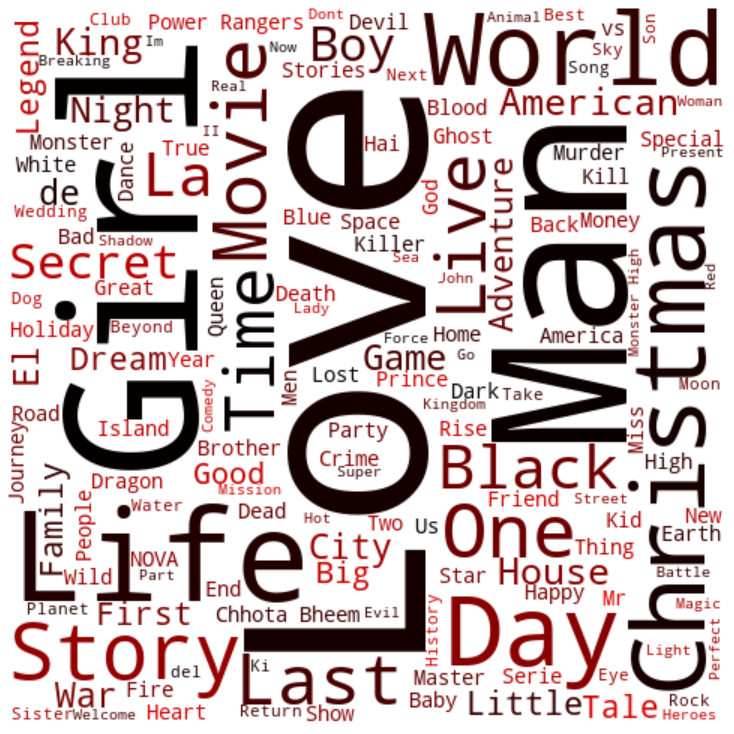

In [ ]:
# 넷플릭스 wordcloud 생성
# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#db0000', '#000000'])

text = str(list(netflix['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

mask = np.array(Image.open('/content/drive/MyDrive/해커톤 1/넷플릭스/netflix_logo.png'))

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150, mask = mask).generate(text)

plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

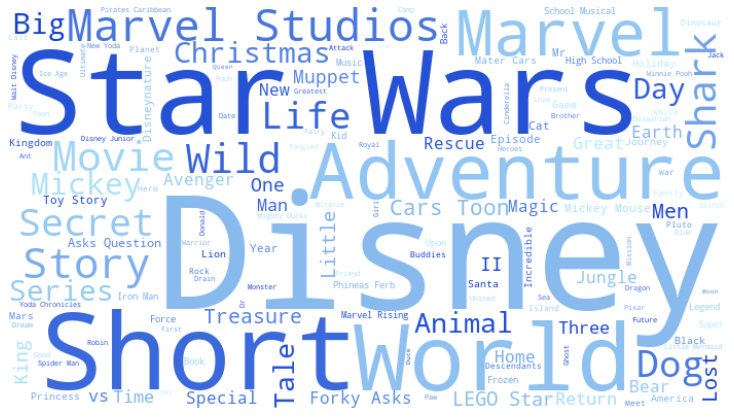

In [ ]:
# 디즈니 wordcloud 생성
# Custom colour map based on Disney palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#113CCF', '#BFF5FD'])

text = str(list(disney['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

mask = np.array(Image.open('/content/drive/MyDrive/해커톤 1/넷플릭스/disney_logo.png'))

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150, mask = mask).generate(text)

plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# 김보성 파트

# Netflix Movies and TV Shows
***

### Load Data

In [ ]:
# 캐글 넷플릭스 데이터
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix.shape

(8807, 12)

In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# 결측치가 있는 column이 있는지 확인

netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64



* 5개의 column에서 결측치가 발견



## 시각화

### Content Type

In [ ]:
col = "type"
grouped = netflix[col].value_counts().reset_index() # type의 unique value들을 count 하고, 인덱스를 reset 시킴.
grouped = grouped.rename(columns = {col : "count", "index" : col})

grouped

,type,count
0,Movie,6131
1,TV Show,2676


In [ ]:
## Content Type을 시각화

trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=['#221f1f', '#b20710']))
layout = go.Layout(title="", height=400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

### 국가별

#### country count 셋업

In [ ]:
country_count = netflix.copy() # netflix 데이터프레임을 copy하고 country_count에 저장
country_count = pd.concat([country_count, netflix["country"].str.split(",", expand = True)], axis = 1)
country_count

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,2,3,4,5,6,7,8,9,10,11
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,None,None,None,None,None,None,None,None,None,None
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,None,None,None,None,None,None,None,None,None,None
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,None,None,None,None,None,None,None,None,None,None
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,...,None,None,None,None,None,None,None,None,None,None
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,...,None,None,None,None,None,None,None,None,None,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
# pandas의 melt를 사용해서 country_count를 구성
# id_vars = ["type", "title"] -> 기준
# value_vars = range(12) -> variable 0 ~ 11
# value_name = "country"

country_count = country_count.melt(id_vars = ["type", "title"], value_vars = range(12), value_name = "country")
country_count = country_count[country_count["country"].notna()] # 결측치가 아닌 값
country_count

,type,title,variable,country
0,Movie,Dick Johnson Is Dead,0,United States
1,TV Show,Blood & Water,0,South Africa
4,TV Show,Kota Factory,0,India
7,Movie,Sankofa,0,United States
8,TV Show,The Great British Baking Show,0,United Kingdom
...,...,...,...,...
78859,Movie,The Look of Silence,8,Germany
85496,Movie,Barbecue,9,Sweden
87666,Movie,The Look of Silence,9,Netherlands
94303,Movie,Barbecue,10,United States


#### 넷플릭스에 작품을 업로드한 국가의 수

In [ ]:
# 국가의 수

country_count["country"].nunique()

197

* **197개국**의 작품이 **넷플릭스**에 업로드되어 있다.

#### 띄어쓰기 삭제

In [ ]:
# 국가별 작품 수 Top 10

country_count["country"].value_counts()[:10]

United States     3211
India             1008
United Kingdom     628
 United States     479
Canada             271
Japan              259
France             212
South Korea        211
Spain              181
 France            181
Name: country, dtype: int64

* United States가 두 개 있는 것을 확인
* 하나로 합쳐 줌

In [ ]:
# 두 번째에 있는 United States와 10번 째의 France를 보면 띄어쓰기가 되어있다. 없애주자.

country_count["country"] = country_count["country"].str.strip()

In [ ]:
# 국가별 작품 수 Top 10

country_count["country"].value_counts()[:10]

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: country, dtype: int64

#### 지도 셋업

In [ ]:
# 지도

country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

## countries 
from collections import Counter

colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]
    
def geoplot(ddf):
    country_with_code, country = {}, {}
    shows_countries = ", ".join(ddf['country'].dropna()).split(", ")
    for c,v in dict(Counter(shows_countries)).items():
        code = ""
        if c.lower() in country_codes:
            code = country_codes[c.lower()]
        country_with_code[code] = v
        country[c] = v

    data = [dict(
            type = 'choropleth',
            locations = list(country_with_code.keys()),
            z = list(country_with_code.values()),
            colorscale = [[0,"rgb(5, 10, 172)"],[0.65,"rgb(40, 60, 190)"],[0.75,"rgb(70, 100, 245)"],\
                        [0.80,"rgb(90, 120, 245)"],[0.9,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'gray',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                title = ''),
          ) ]

    layout = dict(
        title = '',
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict( data=data, layout=layout )
    iplot( fig, validate=False, filename='d3-world-map' )
    return country

#country_vals = geoplot(netflix)

#### 지도: 국가별 작품 수(넷플릭스)

In [ ]:
country_vals = geoplot(netflix)

#### 국가별 작품 수(넷플릭스)

In [ ]:
tabs = Counter(country_vals).most_common(25)

labels = [_[0] for _ in tabs][::-1]
values = [_[1] for _ in tabs][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="", marker=dict(color="#b20710"))

data = [trace1]
layout = go.Layout(title="국가별 작품 수", height=700, legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

* 넷플릭스에 업로드된 작품의 수는 미국이 압도적으로 많음을 확인할 수 있다.
* 미국 작품의 수가 많은 이유로는 먼저 넷플릭스 회사 자체가 미국 회사인 이유가 있을 것이다.
* 또한 할리우드 작품과 같은 주목 받는 많은 컨텐츠들이 미국에서 만들어지는 것도 한몫 한다고 생각한다.
* 미국 다음으로는 인도, 영국, 캐나다, 프랑스 등이 있다.
* 인도에도 발리우드가 있어서 넷플릭스 등록 작품 수에 영향을 끼치는 것이라고 생각한다.

In [ ]:
# 국가별 작품수 Movie & TV Show

px.histogram(country_count, "country", color = "type").update_xaxes(categoryorder = "total descending")

### 날짜별

#### release year 시각화

In [ ]:
# release_year column 시각화

px.histogram(netflix, x = "release_year", color = "release_year")

* **release year**은 실제 작품이 출시된 날짜를 의미한다.
* 2018년에 출시된 작품이 가장 많이 등록되어 있다.
* 최근에 출시된 작품들이 주를 이루고 있음을 확인할 수 있다.
* 드물게 고전 영화들도 있다.

#### date_added column을 datetime 자료형으로 변환

In [ ]:
# date_added column을 datetime 자료형으로 변환

netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [ ]:
# date_added column이 잘 바뀌었는지 샘플 확인

netflix.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4923,s4924,Movie,All The Reasons To Forget,Pedro Coutinho,"Johnny Massaro, Bianca Comparato, Regina Braga...",Brazil,2018-04-19,2017,TV-MA,90 min,"Comedies, Dramas, International Movies",A Brazilian man tries a myriad of ways to get ...


#### date added

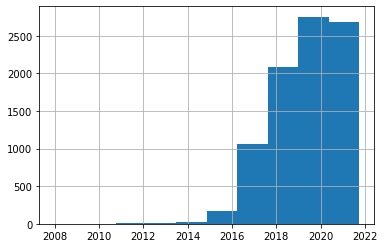

In [ ]:
# 넷플릭스에 추가된 날짜

netflix["date_added"].hist()

* **date added**는 작품이 넷플릭스에 추가된 날짜를 의미한다.
* 최근 5년 간 대부분의 작품이 넷플릭스에 업로드 됨을 확인할 수 있다.

#### 'year_added', 'month_added', 'day_added' column 추가

In [ ]:
# 'year_added', 'month_added', 'day_added' column을 새로 만들어 준다.

netflix['year_added'] = netflix['date_added'].dt.year
netflix['month_added'] = netflix['date_added'].dt.month
netflix['day_added'] = netflix['date_added'].dt.day

#### 연도별 작품 수 셋업

In [ ]:
# 넷플릭스에 추가된 연도별 작품 수

d1 = netflix[netflix["type"] == "TV Show"]
d2 = netflix[netflix["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#b20710"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#221f1f"))
data = [trace1, trace2]
layout = go.Layout(title="연도별 작품 수 증가 추이", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
#fig.show()

#### 넷플릭스에 추가된 연도별 작품 수

In [ ]:
fig.show()

* 2019년에 가장 많이 업로드 됨을 알 수 있다.
* 넷플릭스가 많이 상용화되면서 지속적으로 넷플릭스에 업로드되는 작품 수가 증가하는 추세이다.
* 2021년 전체의 데이터가 아니라 2021년에 업로드 된 작품 수가 줄어드는 것처럼 보이지만 전년도보다 늘었을 것으로 기대된다.

#### 월별 작품 수 셋업

In [ ]:
# 넷플릭스에 추가된 월별 작품 수

d1 = netflix[netflix["type"] == "TV Show"]
d2 = netflix[netflix["type"] == "Movie"]

col = 'month_added'

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#b20710"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#221f1f"))
data = [trace1, trace2]
layout = go.Layout(title="월별 작품 수 증가 추이", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
#fig.show()

#### 넷플릭스에 추가된 월별 작품 수

In [ ]:
fig.show()

* 월별 작품 업로드 수의 차이는 크게 없는 것으로 보인다.

#### 일별 작품 수 셋업

In [ ]:
# 넷플릭스에 추가된 일별 작품 수

d1 = netflix[netflix["type"] == "TV Show"]
d2 = netflix[netflix["type"] == "Movie"]

col = 'day_added'

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#b20710"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#221f1f"))
data = [trace1, trace2]
layout = go.Layout(title="일별 작품 수 증가 추이", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
#fig.show()

#### 넷플릭스에 추가된 일별 작품 수

In [ ]:
fig.show()

* 매월 1일에 작품이 가장 많이 업로드 된 것을 알 수 있다.
* 매월 1일에 새롭게 볼만한 작품을 등록해서 구독자를 잡으려는 전략이 아닐까 싶다.
* 다음으로는 15일이 많고 나머지의 증가 추이는 비슷한 것을 파악할 수 있다.

### 등급별

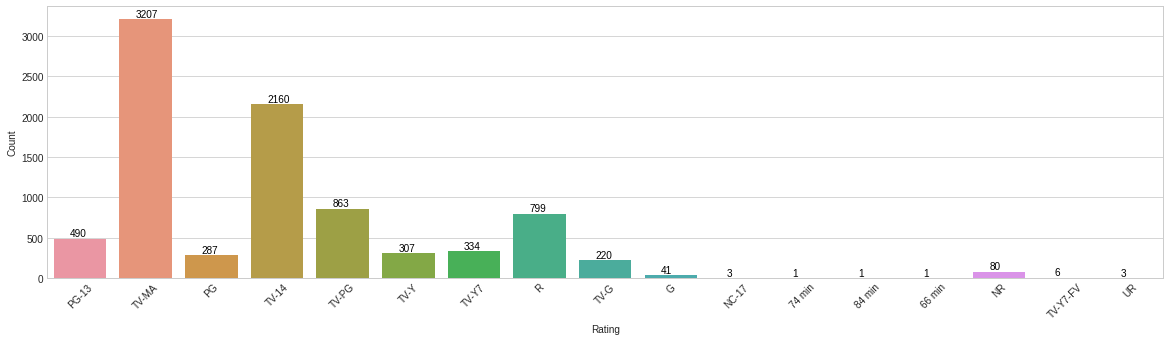

In [ ]:
# 등급별 작품 수

plt.figure(figsize = (20, 5))
plt.style.use('seaborn-whitegrid')
ax = sns.countplot(x = 'rating', data = netflix)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

* **rating column**에 **duration column**의 값인 74min, 84min, 66min이 있다.
* 74min, 84min, 66min 값을 없애고 시각화한다.

#### 등급별 셋업

In [ ]:
# 결측치가 많은 column의 결측치를 No data로 채워줌

netflix['country'].replace(np.nan, 'No Data',inplace  = True)
netflix['cast'].replace(np.nan, 'No Data',inplace  = True)
netflix['director'].replace(np.nan, 'No Data',inplace  = True)

# 나머지 결측치들을 제거

netflix.dropna(inplace=True)

# 중복값 제거

netflix.drop_duplicates(inplace= True)

In [ ]:
# 등급별 작품 수(Content Type)

d1 = netflix[netflix["type"] == "TV Show"]
d2 = netflix[netflix["type"] == "Movie"]

col = "rating"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#b20710"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#221f1f"))
data = [trace1, trace2]
layout = go.Layout(title="등급별 작품 수", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
#fig.show()

#### 디즈니플러스 등급별(Movie & TV Show) 작품 수

In [ ]:
fig.show()

* TV-14는 **청소년(16세 이상)** 등급
* TV-MA, NC-17, NR, R은 **성인(18세 이상)** 등급
* TV-MA, TV-14, R 등급이 대부분을 차지한다.
* **넷플릭스**의 **타겟층**은 <mark>성인</mark>임을 알 수 있다.

# Disney Plus

### Load Data

In [ ]:
disney.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [ ]:
disney.shape

(1450, 12)

In [ ]:
disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [ ]:
# 결측치가 있는 column이 있는지 확인

disney.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64



* 5개의 column에서 결측치가 발견



## 시각화

### Content Type

In [ ]:
col = "type"
grouped = disney[col].value_counts().reset_index() # type의 unique value들을 count 하고, 인덱스를 reset 시킴.
grouped = grouped.rename(columns = {col : "count", "index" : col})

grouped

,type,count
0,Movie,1052
1,TV Show,398


In [ ]:
## Content Type을 시각화

trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=['#08306b', '#9ecae1']))
layout = go.Layout(title="", height=400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

### 국가별

#### country count 셋업

In [ ]:
country_count = disney.copy()
country_count = pd.concat([country_count, disney["country"].str.split(",", expand = True)], axis = 1)
country_count

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,5,6,7,8,9,10,11,12,13,14
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,...,None,None,None,None,None,None,None,None,None,None
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,...,None,None,None,None,None,None,None,None,None,None
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,...,None,None,None,None,None,None,None,None,None,None
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
country_count = country_count.melt(id_vars = ["type", "title"], value_vars = range(12), value_name = "country")
country_count = country_count[country_count["country"].notna()]
country_count

,type,title,variable,country
2,Movie,Ice Age: A Mammoth Christmas,0,United States
5,Movie,Becoming Cousteau,0,United States
7,TV Show,Port Protection Alaska,0,United States
8,TV Show,Secrets of the Zoo: Tampa,0,United States
9,Movie,A Muppets Christmas: Letters To Santa,0,United States
...,...,...,...,...
13807,TV Show,Bonkers,9,Taiwan
14146,Movie,Mulan II,9,China
15257,TV Show,Bonkers,10,Philippines
15596,Movie,Mulan II,10,India


#### 디즈니플러스에 작품을 업로드한 국가의 수

In [ ]:
# 국가의 수

country_count["country"].nunique()

57

* **44개국**의 작품이 **디즈니플러스**에 업로드되어 있다.

#### 띄어쓰기 삭제

In [ ]:
# 국가별 작품 수 Top 10

country_count["country"].value_counts()[:10]

United States      1121
 United States       63
 Canada              51
 United Kingdom      51
United Kingdom       50
Canada               26
 Australia           19
 South Korea         12
 France              12
 Japan               10
Name: country, dtype: int64

* United States가 두 개 있는 것을 확인
* 하나로 합쳐 줌

In [ ]:
# 위의 country를 보면 띄어쓰기가 되어있다. 없애주자.

country_count["country"] = country_count["country"].str.strip()

In [ ]:
# 국가별 작품 수 Top 10

country_count["country"].value_counts()[:10]

United States     1184
United Kingdom     101
Canada              77
Australia           23
France              22
South Korea         13
China               10
Japan               10
Germany              9
Ireland              8
Name: country, dtype: int64

#### 지도 셋업

In [ ]:
# 지도

country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

## countries 
from collections import Counter
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]
    
def geoplot(ddf):
    country_with_code, country = {}, {}
    shows_countries = ", ".join(ddf['country'].dropna()).split(", ")
    for c,v in dict(Counter(shows_countries)).items():
        code = ""
        if c.lower() in country_codes:
            code = country_codes[c.lower()]
        country_with_code[code] = v
        country[c] = v

    data = [dict(
            type = 'choropleth',
            locations = list(country_with_code.keys()),
            z = list(country_with_code.values()),
            colorscale = [[0,"rgb(5, 10, 172)"],[0.65,"rgb(40, 60, 190)"],[0.75,"rgb(70, 100, 245)"],\
                        [0.80,"rgb(90, 120, 245)"],[0.9,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'gray',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                title = ''),
          ) ]

    layout = dict(
        title = '',
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict( data=data, layout=layout )
    iplot( fig, validate=False, filename='d3-world-map' )
    return country

#country_vals = geoplot(disney)

#### 지도: 국가별 작품 수(디즈니플러스)

In [ ]:
country_vals = geoplot(disney)

#### 국가별 작품 수(디즈니플러스)

In [ ]:
tabs = Counter(country_vals).most_common(25)

labels = [_[0] for _ in tabs][::-1]
values = [_[1] for _ in tabs][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="", marker=dict(color="#08306b"))

data = [trace1]
layout = go.Layout(title="국가별 작품 수", height=700, legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

* 디즈니플러스에 업로드된 작품의 수도 미국이 압도적으로 많음을 확인할 수 있다.
* 미국 작품의 수가 많은 이유 또한 디즈니 회사 자체가 미국 회사인 이유가 있을 것이다.
* 또한 할리우드 작품과 같은 주목 받는 많은 컨텐츠들이 미국에서 만들어지는 것도 한몫 한다고 생각한다.
* 미국 다음으로는 영국, 캐나다, 호주, 프랑스 등이 있다.

In [ ]:
# 국가별 작품수 Movie & TV Show

px.histogram(country_count, "country", color = "type").update_xaxes(categoryorder = "total descending")

### 날짜별

#### release year 시각화

In [ ]:
# release_year column 시각화

px.histogram(disney, x = "release_year", color = "release_year")

* **release year**은 실제 작품이 출시된 날짜를 의미한다.
* 최근에 출시된 작품들이 주를 이루고 있음을 확인할 수 있다.
* 넷플릭스에 비해 **고전 영화**의 비중이 높다.

#### date_added column을 datetime 자료형으로 변환

In [ ]:
# date_added column을 datetime 자료형으로 변환

disney['date_added'] = pd.to_datetime(disney['date_added'])
disney.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [ ]:
# date_added column이 잘 바뀌었는지 샘플 확인

disney.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1188,s1189,Movie,Sharks of Lost Island,NaN,Chris McLinden,United States,2019-11-12,2013,TV-PG,45 min,"Action-Adventure, Animals & Nature, Documentary",A team of explorers sets out to explore the se...


#### date added

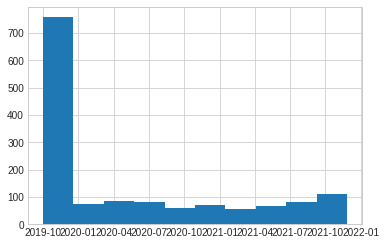

In [ ]:
# 디즈니플러스에 추가된 날짜

disney["date_added"].hist()

* **date added**는 작품이 디즈니플러스에 추가된 날짜를 의미한다.
* 2019년에 등록된 작품의 수가 압도적으로 많다.

#### 'year_added', 'month_added', 'day_added' column 추가

In [ ]:
# 'year_added', 'month_added', 'day_added' column을 새로 만들어 준다.

disney['year_added'] = disney['date_added'].dt.year
disney['month_added'] = disney['date_added'].dt.month
disney['day_added'] = disney['date_added'].dt.day

#### 연도별 작품 수 셋업

In [ ]:
# 디즈니플러스에 추가된 연도별 작품 수

d1 = disney[disney["type"] == "TV Show"]
d2 = disney[disney["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#9ecae1"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#08306b"))
data = [trace1, trace2]
layout = go.Layout(title="연도별 작품 수 증가 추이", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
#fig.show()

#### 디즈니플러스에 추가된 연도별 작품 수

In [ ]:
fig.show()

* 2019년에 디즈니 플러스가 출시되었기에 2019년에 가장 많은 업로드가 됨을 알 수 있다.


#### 월별 작품 수 셋업

In [ ]:
# 디즈니플러스에 추가된 월별 작품 수

d1 = disney[disney["type"] == "TV Show"]
d2 = disney[disney["type"] == "Movie"]

col = 'month_added'

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#9ecae1"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#08306b"))
data = [trace1, trace2]
layout = go.Layout(title="월별 작품 수 증가 추이", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
#fig.show()

#### 디즈니플러스에 추가된 월별 작품 수

In [ ]:
fig.show()

* 넷플릭스와는 다르게 11월에 작품 업로드가 많은 것을 확인할 수 있다.
* 이는 디즈니 플러스가 2019년 11월에 서비스를 시작했기에 11월에 업로드가 몰려 있다고 추측할 수 있다.

#### 일별 작품 수 셋업

In [ ]:
# 디즈니플러스에 추가된 일별 작품 수

d1 = disney[disney["type"] == "TV Show"]
d2 = disney[disney["type"] == "Movie"]

col = 'day_added'

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#9ecae1"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#08306b"))
data = [trace1, trace2]
layout = go.Layout(title="일별 작품 수 증가 추이", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
#fig.show()

#### 디즈니플러스에 추가된 일별 작품 수

In [ ]:
fig.show()

* 12일에 디즈니 플러스의 작품 업로드가 몰려 있음을 확인할 수 있다.
* 이는 디즈니 플러스의 서비스 시작일이 2019년 11월 12일이기 때문이다.

### 등급별

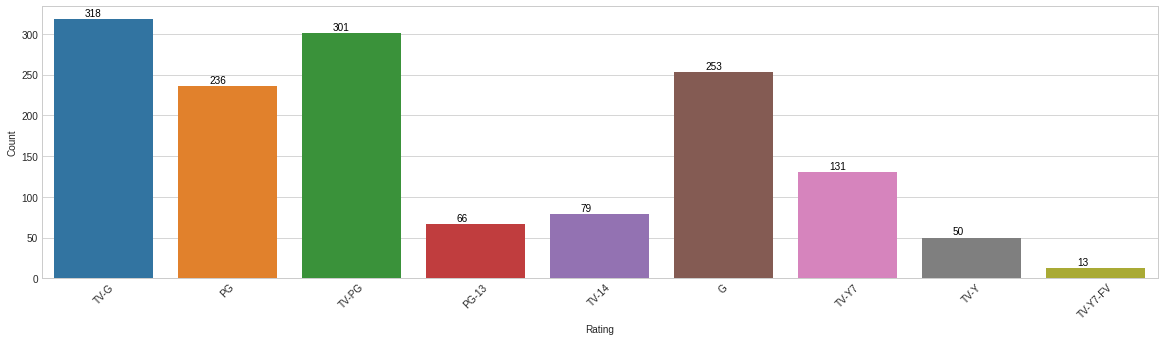

In [ ]:
plt.figure(figsize = (20, 5))
plt.style.use('seaborn-whitegrid')
ax = sns.countplot(x = 'rating', data = disney)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

#### 등급별 셋업(Movie & TV Show)

In [ ]:
d1 = disney[disney["type"] == "TV Show"]
d2 = disney[disney["type"] == "Movie"]

col = "rating"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#9ecae1"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#08306b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
#fig.show()

#### 디즈니플러스 등급별(Movie & TV Show) 작품 수

In [ ]:
fig.show()

* G, TV-G는 **키즈(전체)** 등급
* PG, TV-PG, TV-Y7, TV-Y7-FV은 **어린이(7세 이상)** 등급
* 대체적으로 디즈니플러스의 영상 등급이 낮은 것을 알 수 있다.
* **디즈니플러스**의 **타겟층**은 <mark>어린이</mark>임을 알 수 있다.